In [1]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/machineHack/Soccer fever challenge/LHS_WE_2_Soccer_Fever.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('finish')

finish


In [2]:
import numpy as np
import pandas as pd


In [3]:
train=pd.read_csv("train.csv")
test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')

In [4]:
train[:5]

,season,date,league_id,league,Team 1,Team2,SPI1,SPI2,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,Outcome
0,2019,01/03/19,1979,Chinese Super League,Shandong Luneng,Guizhou Renhe,48.22,37.83,1.75,0.84,45.9,22.1,1.0,0.0,1.39,0.26,2.05,0.54,1.05,0.00,1
1,2019,01/03/19,1979,Chinese Super League,Shanghai Greenland,Shanghai SIPG,39.81,60.08,1.22,1.89,25.6,63.4,0.0,4.0,0.57,2.76,0.80,1.50,0.00,3.26,0
2,2019,01/03/19,1979,Chinese Super League,Guangzhou Evergrande,Tianjin Quanujian,65.59,39.99,2.58,0.62,77.1,28.8,3.0,0.0,0.49,0.45,1.05,0.75,3.15,0.00,1
3,2019,01/03/19,1979,Chinese Super League,Wuhan Zall,Beijing Guoan,32.25,54.82,1.10,1.79,35.8,58.9,0.0,1.0,1.12,0.97,1.51,0.94,0.00,1.05,0
4,2019,01/03/19,1979,Chinese Super League,Chongqing Lifan,Guangzhou RF,38.24,40.45,1.57,1.24,26.2,21.3,2.0,2.0,2.77,3.17,1.05,2.08,2.10,2.10,1


**Understand the Distribution of Target Variable**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


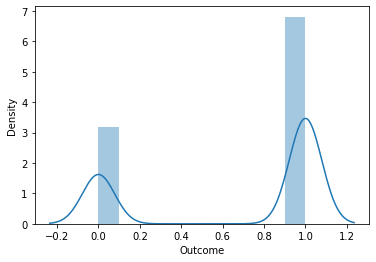

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(train['Outcome'])
plt.show()

In [6]:
train['date_time'] = pd.to_datetime(train['date'], format='%d/%m/%y')
#train['year'] = train['date_time'].dt.year
train['month'] = train['date_time'].dt.month
train['weekday'] = train['date_time'].dt.weekday

# test
test['date_time'] = pd.to_datetime(test['date'], format='%d/%m/%y')
#test['year'] = test['date_time'].dt.year
test['month'] = test['date_time'].dt.month
test['weekday'] = test['date_time'].dt.weekday

In [7]:
train.isnull().sum()

season            0
date              0
league_id         0
league            0
Team 1            0
Team2             0
SPI1              0
SPI2              0
proj_score1       0
proj_score2       0
importance1    4916
importance2    4916
score1         4800
score2         4800
xg1            5728
xg2            5728
nsxg1          5728
nsxg2          5728
adj_score1     5728
adj_score2     5728
Outcome           0
date_time         0
month             0
weekday           0
dtype: int64

In [8]:
def divideFeatures(df):
    numerical_features = df.select_dtypes(include=[np.number])
    categorical_features = df.select_dtypes(include=[np.object])
    return numerical_features, categorical_features

In [9]:
continuous_data, categorical_data = divideFeatures(train)

In [10]:
for col in categorical_data:
    print(f'{col} : {categorical_data[col].unique()}')

date : ['01/03/19' '02/03/19' '03/03/19' '08/03/19' '09/03/19' '10/03/19'
 '29/03/19' '30/03/19' '31/03/19' '05/04/19' '06/04/19' '07/04/19'
 '12/04/19' '13/04/19' '14/04/19' '19/04/19' '20/04/19' '21/04/19'
 '26/04/19' '27/04/19' '28/04/19' '04/05/19' '05/05/19' '10/05/19'
 '11/05/19' '12/05/19' '17/05/19' '18/05/19' '19/05/19' '24/05/19'
 '25/05/19' '26/05/19' '01/06/19' '02/06/19' '08/06/19' '14/06/19'
 '15/06/19' '16/06/19' '21/06/19' '22/06/19' '23/06/19' '29/06/19'
 '30/06/19' '01/07/19' '05/07/19' '06/07/19' '07/07/19' '10/07/19'
 '11/07/19' '12/07/19' '13/07/19' '16/07/19' '17/07/19' '20/07/19'
 '21/07/19' '27/07/19' '28/07/19' '02/08/19' '03/08/19' '09/08/19'
 '10/08/19' '11/08/19' '13/08/19' '14/08/19' '15/08/19' '13/09/19'
 '14/09/19' '15/09/19' '20/09/19' '21/09/19' '22/09/19' '26/09/19'
 '13/10/19' '18/10/19' '19/10/19' '20/10/19' '25/10/19' '26/10/19'
 '27/10/19' '01/11/19' '22/11/19' '23/11/19' '27/11/19' '30/11/19'
 '20/10/20' '21/10/20' '22/10/20' '27/10/20' '28/10/20'

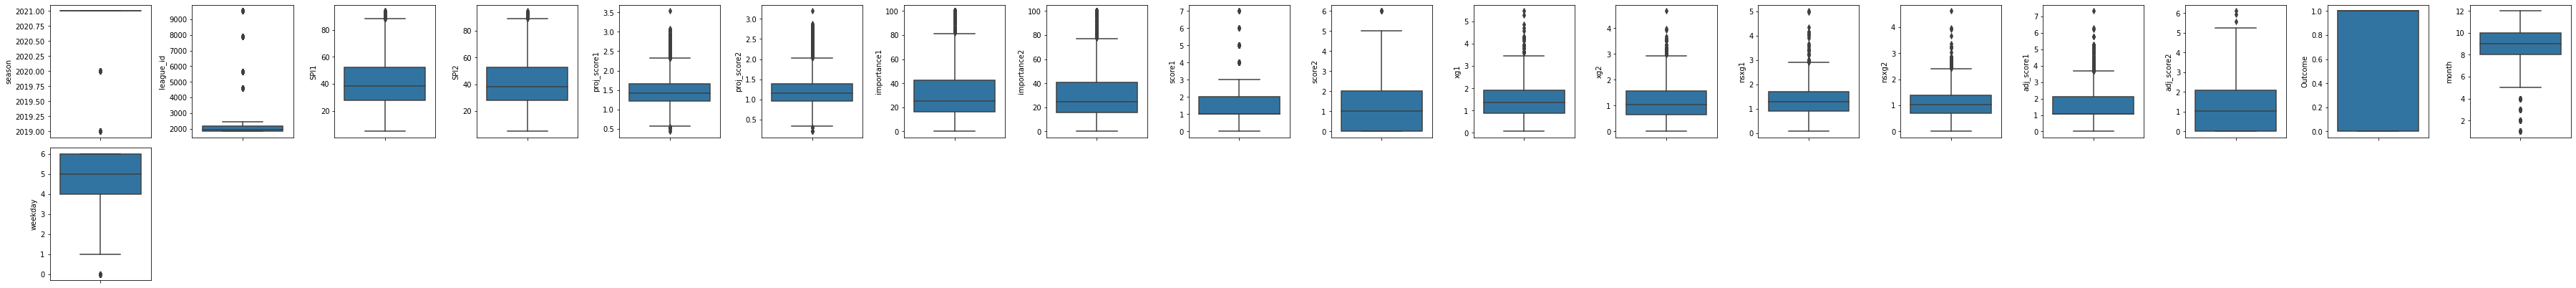

In [11]:
# boxplots of numerical features for outlier detection
import seaborn as sns
fig = plt.figure(figsize=(50,50))
for i in range(len(continuous_data.columns)):
    fig.add_subplot(18, 18, i+1)
    sns.boxplot(y=continuous_data.iloc[:,i])
plt.tight_layout()
plt.show()

In [12]:
train['importance1'].nunique()

701

In [13]:
train['importance2'].nunique()

700

In [14]:
train['nsxg1'].nunique()

285

In [15]:
train['adj_score2'].nunique()

104

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7443 entries, 0 to 7442
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   season       7443 non-null   int64         
 1   date         7443 non-null   object        
 2   league_id    7443 non-null   int64         
 3   league       7443 non-null   object        
 4   Team 1       7443 non-null   object        
 5   Team2        7443 non-null   object        
 6   SPI1         7443 non-null   float64       
 7   SPI2         7443 non-null   float64       
 8   proj_score1  7443 non-null   float64       
 9   proj_score2  7443 non-null   float64       
 10  importance1  2527 non-null   float64       
 11  importance2  2527 non-null   float64       
 12  score1       2643 non-null   float64       
 13  score2       2643 non-null   float64       
 14  xg1          1715 non-null   float64       
 15  xg2          1715 non-null   float64       
 16  nsxg1 

In [17]:
features = ['season','league_id', 'Team 1', 'Team2','SPI1', 'SPI2', 'proj_score1', 'proj_score2',
            
                # with nan:
                'importance1', 'importance2','score1', 'score2','xg1', 'xg2', 
                'nsxg1', 'nsxg2', 
                'adj_score1', 'adj_score2',
                
                # from date:
                #'month', 
                #'weekday'
               ]

cat_features = [#'season',
                'league_id', 'Team 1', 'Team2',
    
                #'month', 
                #'weekday'
               ]

In [18]:
X = train[features]
y = train['Outcome']

In [19]:
SEED = 42

In [20]:
!pip install catboost

     |████████████████████████████████| 67.4 MB 28 kB/s 


In [21]:
from catboost import CatBoostClassifier, cv, Pool

from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

In [22]:
# Let's split the train data into training and validation sets.

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=SEED)

In [23]:
# Test data
X_test = test[features]

In [24]:
X_test.shape

(4008, 18)

In [48]:
# Create Pool data
train_data = Pool(data=X_train,
                  label=y_train,
                  cat_features=cat_features
                 )

valid_data = Pool(data=X_valid,
                  label=y_valid,
                  cat_features=cat_features
                 )

In [49]:
CATBOOST_PARAMS = {
    'random_seed':SEED,
    'learning_rate':0.3,
#    'auto_class_weights':'Balanced',
    'iterations':175,
    'loss_function':'Logloss',
#    'eval_metric':'AUC',    
    'max_depth':6,
    'early_stopping_rounds':10,
    'min_data_in_leaf':10}

In [50]:
%%time
model = CatBoostClassifier(**CATBOOST_PARAMS)

model.fit(train_data,
          eval_set=(valid_data),
          use_best_model=True, 
         logging_level= 'Silent',  #'Verbose',  # you can uncomment this for text output
         plot=True
        )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

CPU times: user 715 ms, sys: 42.3 ms, total: 758 ms
Wall time: 501 ms


In [51]:
log_loss(y_valid, model.predict(X_valid))

0.3247487343875439

In [52]:
# Evaluate with predict_proba !!!
log_loss(y_valid, model.predict_proba(X_valid))


0.03666666856498104

In [53]:
# with Labels
submission = pd.read_csv('submission.csv' )
submission['Outcome'] = model.predict(X_test)
submission.to_csv('cat_submission.csv',index=False, header=True)
submission

,Outcome
0,1
1,1
2,0
3,1
4,0
...,...
4003,1
4004,0
4005,1
4006,1


In [54]:
submission['Outcome'].value_counts()

1    2715
0    1293
Name: Outcome, dtype: int64

In [55]:
# with Probabilities
preds = model.predict_proba(X_test)
submission['Outcome'] = [pred[1] for pred in preds]
submission.to_csv('cat_proba_submission.csv',index=False, header=True)
submission

,Outcome
0,0.999450
1,0.998379
2,0.000559
3,0.943518
4,0.000667
...,...
4003,0.673452
4004,0.279210
4005,0.994276
4006,0.998426


In [56]:
all_train_data = Pool(data=X,
                      label=y,
                      cat_features=cat_features
                     )

In [57]:
%%time
grid = {'learning_rate': [0.3, 0.5, 0.4, 0.1],
        'max_depth': [4,  6,  8,  10],
        'l2_leaf_reg': [1,  3,  5,  7, 9],
        #'grow_policy': ['SymmetricTree', 'Depthwise', 'Lossguide']
       }

model = CatBoostClassifier(iterations=175)


CPU times: user 160 µs, sys: 16 µs, total: 176 µs
Wall time: 178 µs


In [58]:
randomized_search_result = model.randomized_search(grid,
            X=all_train_data,
            cv=5,
            partition_random_seed=SEED,
            search_by_train_test_split=True,
            refit=True,
            shuffle=True,
            stratified=None,
            train_size=0.8,
            verbose=0,
            plot=False)

0:	learn: 0.2134654	test: 0.2282869	best: 0.2282869 (0)	total: 6.75ms	remaining: 1.17s
1:	learn: 0.1240903	test: 0.1265862	best: 0.1265862 (1)	total: 14.2ms	remaining: 1.23s
2:	learn: 0.1025312	test: 0.1050872	best: 0.1050872 (2)	total: 24.6ms	remaining: 1.41s
3:	learn: 0.0828346	test: 0.0850337	best: 0.0850337 (3)	total: 30.6ms	remaining: 1.31s
4:	learn: 0.0759374	test: 0.0753171	best: 0.0753171 (4)	total: 36.1ms	remaining: 1.23s
5:	learn: 0.0675590	test: 0.0654937	best: 0.0654937 (5)	total: 42.1ms	remaining: 1.19s
6:	learn: 0.0604048	test: 0.0591617	best: 0.0591617 (6)	total: 47.6ms	remaining: 1.14s
7:	learn: 0.0573435	test: 0.0566153	best: 0.0566153 (7)	total: 53ms	remaining: 1.11s
8:	learn: 0.0548689	test: 0.0544519	best: 0.0544519 (8)	total: 58.5ms	remaining: 1.08s
9:	learn: 0.0529633	test: 0.0527675	best: 0.0527675 (9)	total: 63.9ms	remaining: 1.05s
10:	learn: 0.0512946	test: 0.0521571	best: 0.0521571 (10)	total: 69.5ms	remaining: 1.04s
11:	learn: 0.0491657	test: 0.0508163	best: 

In [67]:
randomized_search_result

AttributeError: ignored

In [59]:
log_loss(y_valid, model.predict_proba(X_valid))

0.003807786066605326

In [60]:
# Predict and submit
# with Probabilities
submission = pd.read_csv('submission.csv' )

preds = model.predict_proba(X_test)
#submission['Outcome'] = [pred[1] for pred in preds]
submission['Outcome'] = preds[:,1]

submission.to_csv('cv_proba_submission.csv',index=False, header=True)
submission

,Outcome
0,0.999998
1,0.999937
2,0.000004
3,0.992721
4,0.000002
...,...
4003,0.801284
4004,0.046089
4005,0.999900
4006,0.999975


In [80]:
X_test

,season,league_id,Team 1,Team2,SPI1,SPI2,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
22,2019,1979,Chongqing Lifan,Shenzhen FC,35.06,33.78,1.53,1.02,43.6,26.9,1.0,0.0,0.60,0.81,0.78,1.07,1.05,0.00
40,2019,1979,Tianjin Quanujian,Shanghai SIPG,36.77,57.68,1.16,1.77,36.5,61.1,0.0,0.0,0.56,1.66,0.51,1.27,0.00,0.00
52,2019,1979,Chongqing Lifan,Guangzhou Evergrande,36.95,63.34,0.99,1.95,20.7,71.4,0.0,1.0,0.53,2.38,0.73,1.47,0.00,1.05
91,2019,1979,Guizhou Renhe,Tianjin Quanujian,32.33,33.95,1.39,1.05,61.9,59.3,2.0,0.0,1.65,2.39,1.40,2.31,2.10,0.00
92,2019,1979,Dalian Aerbin,Shanghai SIPG,43.63,58.51,1.14,1.62,10.5,71.6,1.0,2.0,0.29,1.34,1.05,1.52,1.05,2.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7398,2021,1869,Real Betis,Real Sociedad,73.14,78.21,1.33,1.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7402,2021,1843,Angers,Clermont Foot,57.13,53.65,1.36,0.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7409,2021,1843,Reims,St Etienne,50.01,57.02,1.17,1.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7428,2021,1846,Schalke 04,1. FC Nürnberg,49.30,33.35,1.84,0.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
test_data.num_row()

745

In [25]:
%%time

from sklearn.model_selection import StratifiedKFold

n_fold = 5 # amount of data folds
folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=SEED)

params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'verbose': 200,
          'random_seed': SEED,
          'learning_rate':0.23,'max_depth':5
         }

test_data = Pool(data=X_test,
                 cat_features=cat_features)


scores = []
prediction = np.zeros(X_test.shape[0])
for fold_n, (train_index, valid_index) in enumerate(folds.split(X, y)):
    
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index] # train and validation data splits
    y_train, y_valid = y[train_index], y[valid_index]
    
    train_data = Pool(data=X_train, 
                      label=y_train,
                      cat_features=cat_features)
    valid_data = Pool(data=X_valid, 
                      label=y_valid,
                      cat_features=cat_features)
    
    model = CatBoostClassifier(**params)
    model.fit(train_data,
              eval_set=valid_data, 
              use_best_model=True
             )
    
    score = model.get_best_score()['validation']['AUC']
    scores.append(score)

    y_pred = model.predict_proba(test_data)[:, 1]
    prediction += y_pred

prediction /= n_fold
print('CV mean: {:.4f}, CV std: {:.4f}'.format(np.mean(scores), np.std(scores)))

0:	test: 0.9700924	best: 0.9700924 (0)	total: 61.9ms	remaining: 1m 1s
200:	test: 0.9986276	best: 0.9993024 (42)	total: 1.95s	remaining: 7.76s
400:	test: 0.9986442	best: 0.9993024 (42)	total: 3.59s	remaining: 5.36s
600:	test: 0.9987564	best: 0.9993024 (42)	total: 5.15s	remaining: 3.42s
800:	test: 0.9987833	best: 0.9993024 (42)	total: 6.7s	remaining: 1.66s
999:	test: 0.9987958	best: 0.9993024 (42)	total: 8.21s	remaining: 0us

bestTest = 0.999302398
bestIteration = 42

Shrink model to first 43 iterations.
0:	test: 0.9768598	best: 0.9768598 (0)	total: 10.2ms	remaining: 10.2s
200:	test: 0.9995204	best: 0.9995744 (115)	total: 1.85s	remaining: 7.37s
400:	test: 0.9995765	best: 0.9995889 (311)	total: 3.46s	remaining: 5.17s
600:	test: 0.9996159	best: 0.9996180 (596)	total: 4.97s	remaining: 3.3s
800:	test: 0.9996014	best: 0.9996201 (602)	total: 6.51s	remaining: 1.62s
999:	test: 0.9995765	best: 0.9996201 (602)	total: 8.08s	remaining: 0us

bestTest = 0.9996200561
bestIteration = 602

Shrink model t

In [71]:
submission[:2]

,Outcome
0,0.999998
1,0.999937


In [26]:
len(prediction)

4008

In [31]:
print(prediction)

[9.99936926e-01 9.99893659e-01 5.06086687e-05 ... 9.94610371e-01
 9.99809791e-01 9.98718170e-01]


In [27]:
import pandas as pd

sub = pd.read_csv('./submission.csv')
sub['Outcome'] = prediction
sub_name = 'catboost_submission_sratifiedKfold.csv'
sub.to_csv(sub_name, index=False)

print(f'Saving submission file as: {sub_name}')

Saving submission file as: catboost_submission_sratifiedKfold.csv


In [29]:
sub[:3]

,Outcome
0,0.999937
1,0.999894
2,0.000051


In [28]:
a=pd.read_csv('/content/catboost_submission_sratifiedKfold.csv')
a[:3]

,Outcome
0,0.999937
1,0.999894
2,0.000051
